# Customer segmentation

**Content**

---


You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

---

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


**Mount the drive**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the libraries and the data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [7]:
data = pd.read_csv("/content/drive/MyDrive/ML/K-means/Mall_Customers.csv")

 **Viewing and Describing the data**

In [8]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* dropped the id column as that does not seem relevant to the context. *

In [ ]:
data.drop(["CustomerID"], axis = 1, inplace=True)

In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Understanding and Visualizing Data**

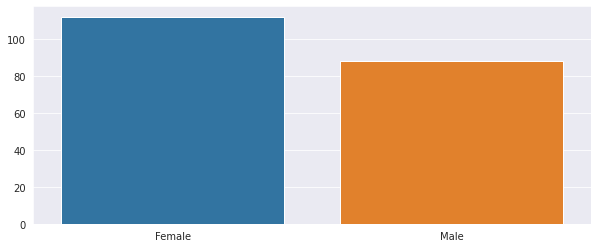

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

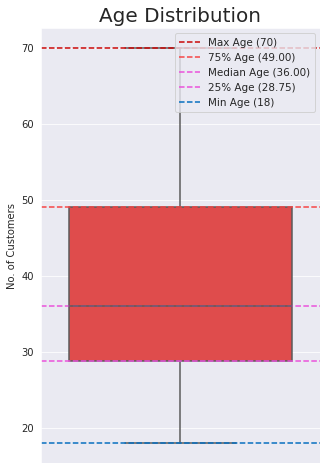

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

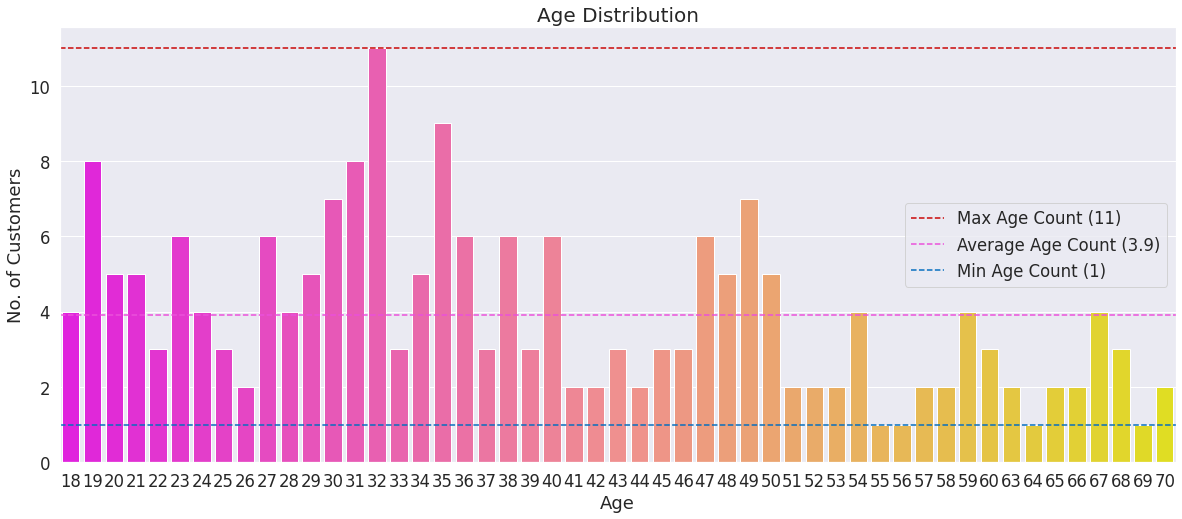

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

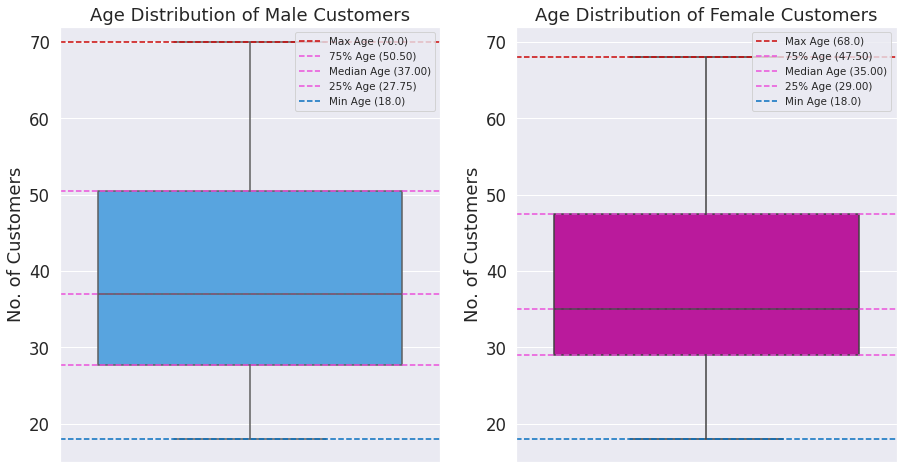

In [ ]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

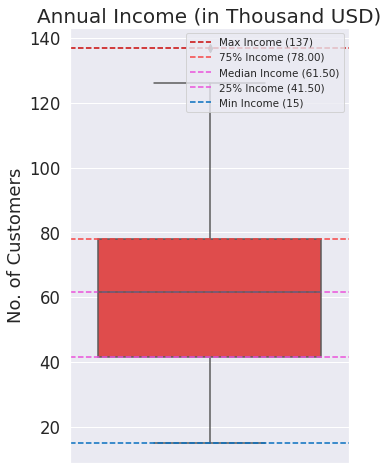

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual Income (k$)"], color="#f73434")
ax.axhline(y=data["Annual Income (k$)"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data["Annual Income (k$)"].max()})')
ax.axhline(y=data["Annual Income (k$)"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data["Annual Income (k$)"].describe()[6]:.2f})')
ax.axhline(y=data["Annual Income (k$)"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data["Annual Income (k$)"].median():.2f})')
ax.axhline(y=data["Annual Income (k$)"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data["Annual Income (k$)"].describe()[4]:.2f})')
ax.axhline(y=data["Annual Income (k$)"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data["Annual Income (k$)"].min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

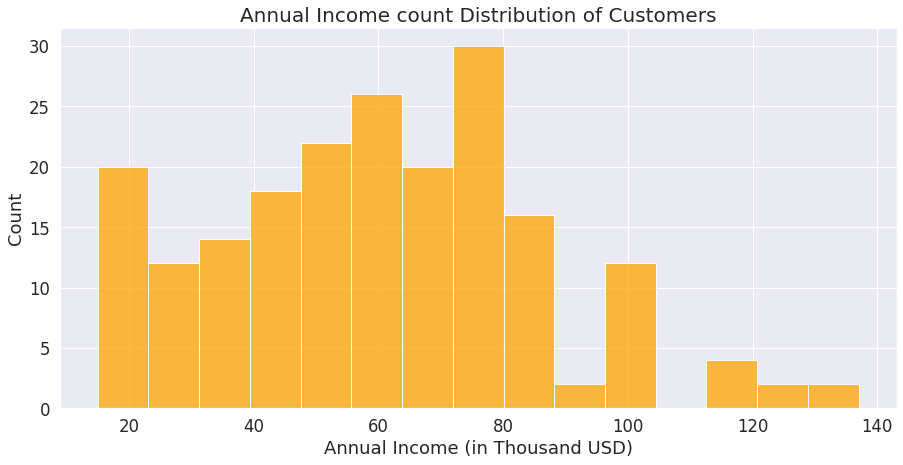

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data["Annual Income (k$)"], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

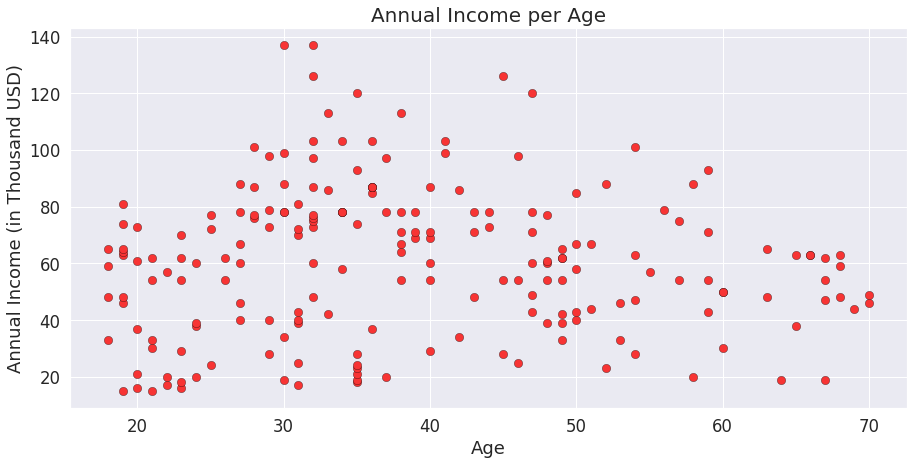

In [ ]:
ig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data["Annual Income (k$)"], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

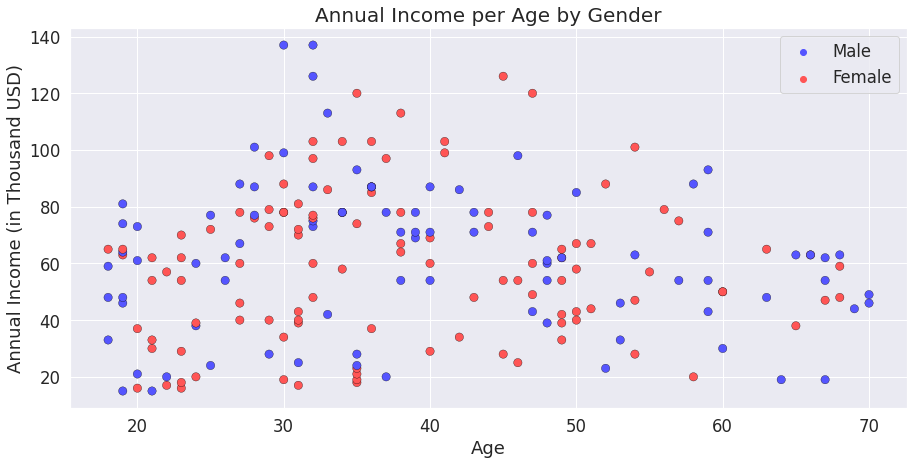

In [ ]:
ig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data["Annual Income (k$)"], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

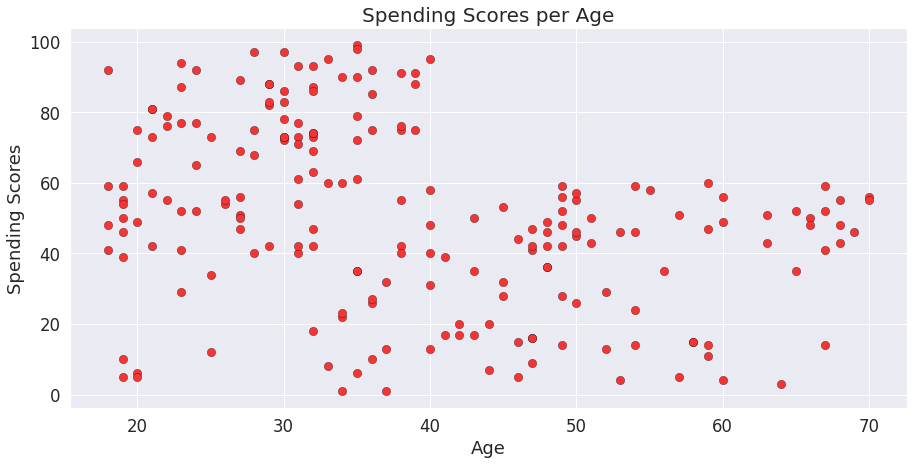

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

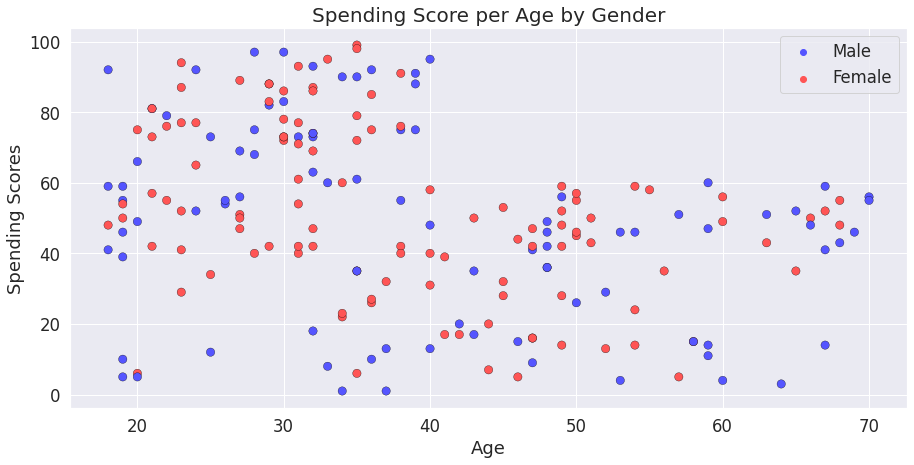

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending Score (1-100)'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

# K - Means Clustering

In [ ]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


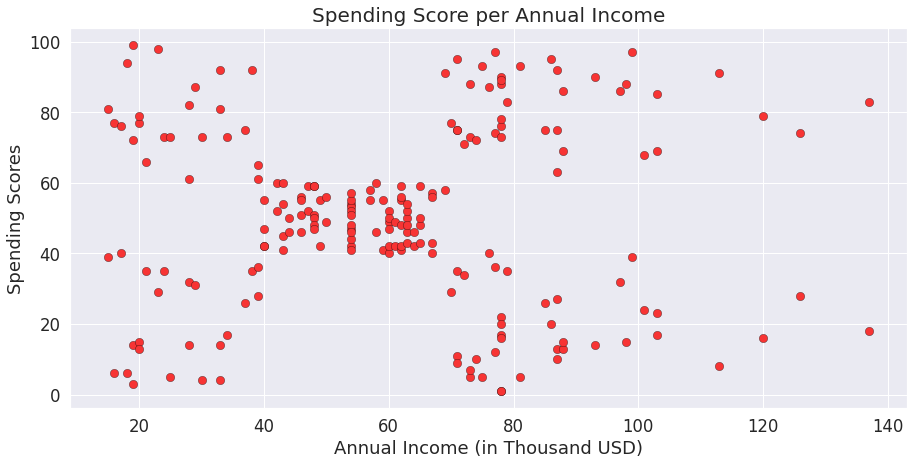

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending Score (1-100)'],x=clustering_data['Annual Income (k$)'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

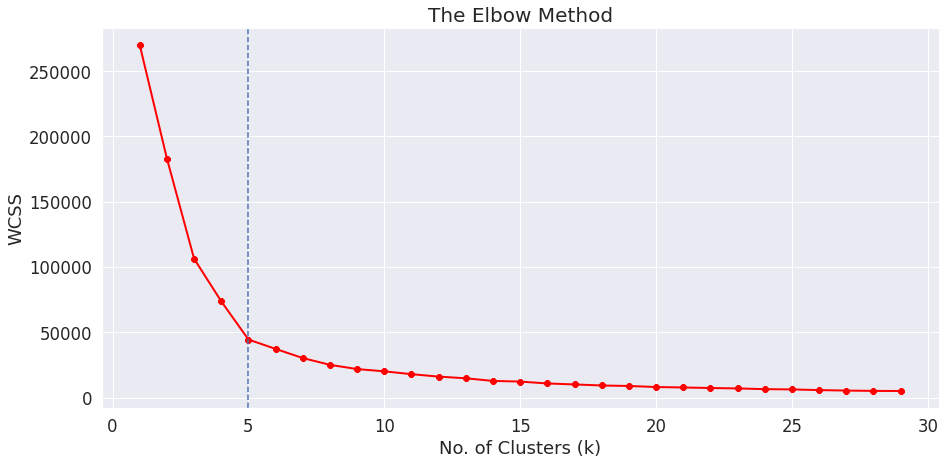

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3


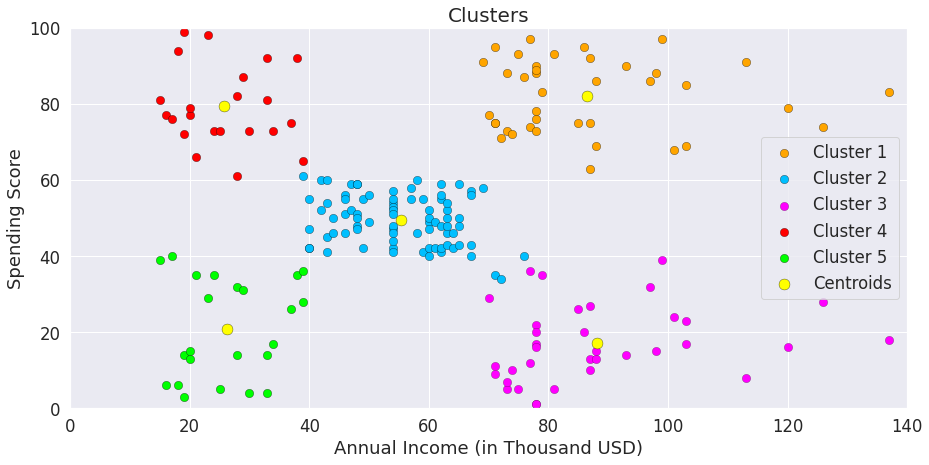

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

**Cluster Green - Balanced Customers** :

They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

**Cluster purple - Pinch Penny Customers** :

Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

**Cluster Blue - Normal Customer** :

Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

**Cluster Red - Spender**s :

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

**Cluster Orange - Target Customers** :

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

​